In [2]:
cd /home/jovyan/workspace/dataset

/home/jovyan/workspace/dataset


In [3]:
import os

In [4]:
import zipfile
for file in os.listdir():
    print(file)
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)
    

BW_DB


In [5]:
!pip install scikit-learn

  Using cached scikit_learn-1.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [6]:
!pip install "pillow==6.2.1"


  Using cached Pillow-6.2.1-cp39-cp39-linux_x86_64.whl
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires nvidia-ml-py3, which is not installed.
bokeh 2.4.2 requires pillow>=7.1.0, but you have pillow 6.2.1 which is incompatible.


In [7]:
!pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import glob
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import cv2
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import alexnet
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torchvision.datasets as datasets
import torchvision.models as a
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix, classification_report
import math
%matplotlib inline

In [2]:
data_dir = '/home/jovyan/workspace/dataset/BW_DB/train'
IMAGE_DIM=256
print(os.listdir(data_dir))

['fear', 'happy', 'sad', 'angry', 'surprise', 'neutral']


In [3]:
train_dataset = None
test_dataset = None
def load_data(train_path, test_path, batch_size, input_size):
    global train_dataset
    global test_dataset
    ######## Write your code here ########
    
    transform_dict = {
                    'src': transforms.Compose([
                      transforms.Grayscale(3),
                      transforms.Resize(input_size),
                      transforms.RandomHorizontalFlip(), 
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
     ])}

    test_dataset = datasets.ImageFolder(root=test_path, transform=transform_dict['src'])
    train_dataset = datasets.ImageFolder(root=train_path, transform=transform_dict['src'])

    dataset_size = len(test_dataset)
    
    test_size = int(math.floor(0.6 * dataset_size))
    val_size = int(math.ceil(0.4 * dataset_size))

    test_data, val_data= td.random_split(test_dataset, [test_size, val_size])
    
    data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_test  = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_val  = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    
    return data_loader_train, data_loader_test, data_loader_val

(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


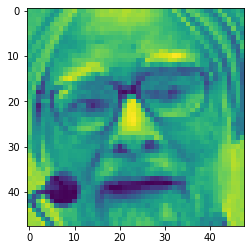

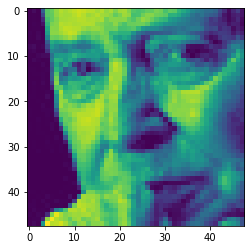

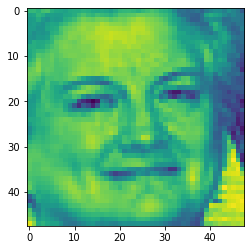

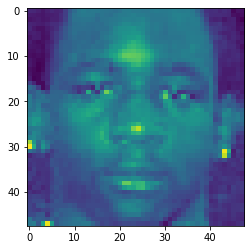

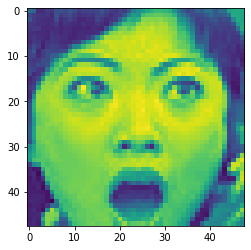

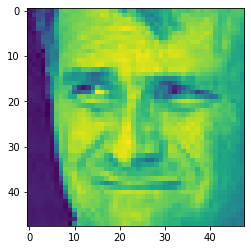

In [4]:
train_path = "/home/jovyan/workspace/dataset/BW_DB/train/"
test_path = "/home/jovyan/workspace/dataset/BW_DB/test/"

######## Write your code here ########
AngerImage = image.imread(train_path+"/angry/1.jpg")
plt.figure()
plt.imshow(AngerImage)
FearImage = image.imread(train_path+"/fear/1013.jpg")
plt.figure()
plt.imshow(FearImage)
HappyImage = image.imread(train_path+"/happy/100.jpg")
plt.figure()
plt.imshow(HappyImage)
NeutralImage = image.imread(train_path+"/neutral/10110.jpg")
plt.figure()
plt.imshow(NeutralImage)
SurpriseImage = image.imread(train_path+"/surprise/20003.jpg")
plt.figure()
plt.imshow(SurpriseImage)
SadImage = image.imread(train_path+"/sad/1031.jpg")
plt.figure()
plt.imshow(SadImage)
print(AngerImage.shape)
print(FearImage.shape)
print(HappyImage.shape)
print(NeutralImage.shape)
print(SurpriseImage.shape)
print(SadImage.shape)

In [5]:
train_loader, test_loader, val_loader = load_data(train_path, test_path, 32, (128, 128))
print(len(train_loader), len(test_loader), len(val_loader))

282 27 18


In [6]:
classes = ('anger', 'happy', 'neutral', 'surprise', 'sad', 'fear')

In [7]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = next(dataiter)
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


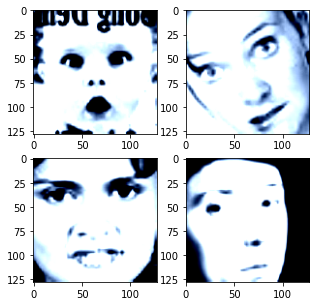

In [8]:
plot_data_loader(train_loader, (2, 2))

In [9]:
print(torch.__version__)

1.9.1


In [24]:
model = alexnet()
n_classes = 6

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);



Device: cuda:0


In [25]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);

Device: cuda:0


In [27]:
for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        print(images.shape)
        #print(labels)
        if i == 5:
          break

torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])


In [28]:
def evaluate(model, val_loader):
      model.eval() 
      with torch.no_grad(): 
        correct = 0
        total = 0
        for data in val_loader:
          images, labels = data[0].to(device), data[1].to(device)
          labels=torch.flatten(labels)
          outputs = model(images)
          loss = criterion(outputs, labels)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
      accuracy = (correct / total) * 100
      model.train()
      return accuracy, loss.item()

In [29]:
def train(num_epochs, model, train_loader, val_loader, criterion, optimizer):
    total_steps = len(train_loader)
    t1 = time.time()

    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []

    loss = None
    clip_value = 5
    for epoch in range(num_epochs):
        for i, data in enumerate(train_loader):
            images, labels = data[0].to(device), data[1].to(device)
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            # Backprop and optimisation
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value, error_if_nonfinite=False)
            optimizer.step()
            # Train accuracy
            total = labels.size(0)
            _,predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            if (i + 1) % 91 == 0:
                val_accu, val_loss = evaluate(model, val_loader)
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}, val_loss: {:.4f}, val_accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100, val_loss, val_accu))
                training_loss.append(loss.item())
                training_accuracy.append((correct / total) * 100)
                validation_accuracy.append(val_accu)
                validation_loss.append(val_loss)
                
    print("######## Training Finished in {} seconds ###########".format(time.time()-t1))
    return training_loss, training_accuracy, model

In [30]:
def confusion_matrix_for_specific_LR(lr, model, test_loader):
    y_pred = []
    y_true = []
    for i, data in enumerate(test_loader):
        
        inputs, labels = data[0].to(device), data[1].to(device)
        output = model(inputs) # Feed Network
        
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

    # constant for classes
    # classes = ('neutral', 'interested', 'Disappointed')
    classes = ('angry', 'sad', 'neutral', 'surprise', 'happy', 'fear')

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)

    import seaborn as sns

    # sns.heatmap(cf_matrix, annot=True)
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.title(f'Confusion matrix for lr {lr}')
    plt.savefig(f'Confusion_matrix_AlexNet_BW_lr_{lr}.png')
    print(classification_report(y_true, y_pred, target_names=['angry', 'sad', 'neutral', 'surprise', 'happy', 'fear']))

In [31]:
def test(model, test_loader):
    model.eval() 
    with torch.no_grad(): 
      correct = 0
      total = 0
      for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        labels=torch.flatten(labels)
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return (correct / total) * 100

In [32]:
def saveModel(learning_rate):
    torch.save(model.state_dict(), f"/home/jovyan/workspace/AlexNet_BW_GridSearch_lr_{learning_rate}.pt")

Results of the learning rate = 0.1
Epoch [1/50], Step [91/282], Loss: 1.8523, Accuracy: 18.75, val_loss: 1.7989, val_accuracy: 29.80%
Epoch [1/50], Step [182/282], Loss: 1.7210, Accuracy: 18.75, val_loss: 1.9466, val_accuracy: 14.72%
Epoch [1/50], Step [273/282], Loss: 1.7949, Accuracy: 21.88, val_loss: 1.8854, val_accuracy: 17.95%
Epoch [2/50], Step [91/282], Loss: 1.8082, Accuracy: 18.75, val_loss: 1.6461, val_accuracy: 14.54%
Epoch [2/50], Step [182/282], Loss: 1.9343, Accuracy: 12.50, val_loss: 1.8077, val_accuracy: 10.41%
Epoch [2/50], Step [273/282], Loss: 1.8260, Accuracy: 34.38, val_loss: 1.8765, val_accuracy: 14.18%
Epoch [3/50], Step [91/282], Loss: 1.8632, Accuracy: 18.75, val_loss: 1.6444, val_accuracy: 26.75%
Epoch [3/50], Step [182/282], Loss: 1.7960, Accuracy: 15.62, val_loss: 1.7673, val_accuracy: 16.70%
Epoch [3/50], Step [273/282], Loss: 1.6965, Accuracy: 31.25, val_loss: 1.5710, val_accuracy: 28.37%
Epoch [4/50], Step [91/282], Loss: 1.7194, Accuracy: 28.12, val_loss

/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       117
         sad       0.00      0.00      0.00       120
     neutral       0.00      0.00      0.00       199
    surprise       0.00      0.00      0.00       150
       happy       0.18      1.00      0.30       147
        fear       0.00      0.00      0.00       101

    accuracy                           0.18       834
   macro avg       0.03      0.17      0.05       834
weighted avg       0.03      0.18      0.05       834

Testing Accuracy for learning rate 0.1 = 17.62589928057554
Results of the learning rate = 0.01
Epoch [1/50], Step [91/282], Loss: 1.9174, Accuracy: 15.62, val_loss: 2.0652, val_accuracy: 16.88%
Epoch [1/50], Step [182/282], Loss: 1.8676, Accuracy: 12.50, val_loss: 2.0051, val_accuracy: 28.19%
Epoch [1/50], Step [273/282], Loss: 1.7889, Accuracy: 21.88, val_loss: 1.9600, val_accuracy: 12.93%
Epoch [2/50], Step [91/282], Loss: 1.9101, Accuracy: 25.00, val

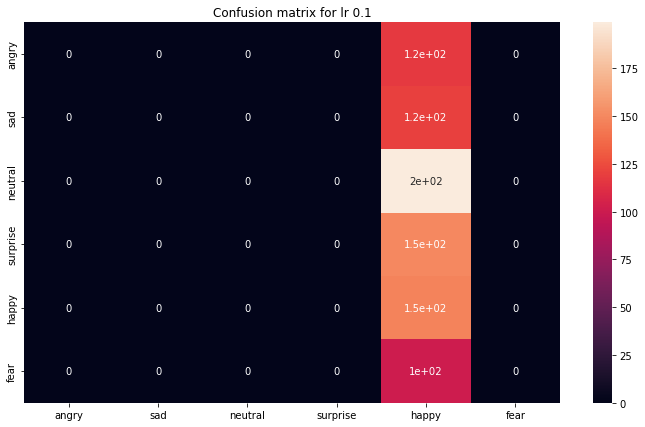

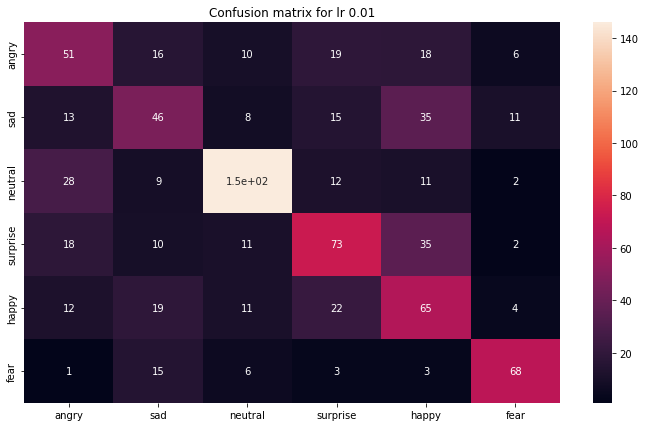

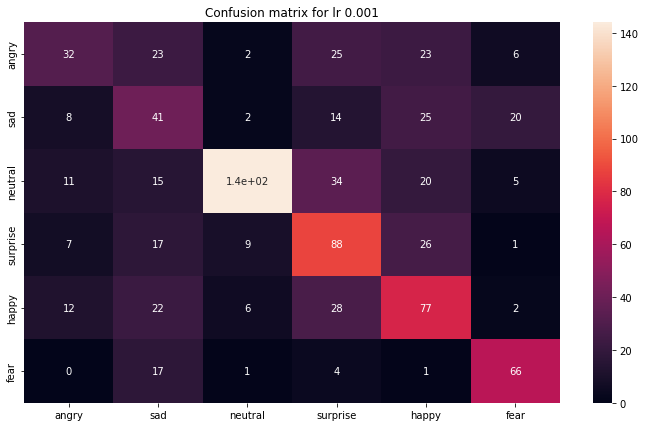

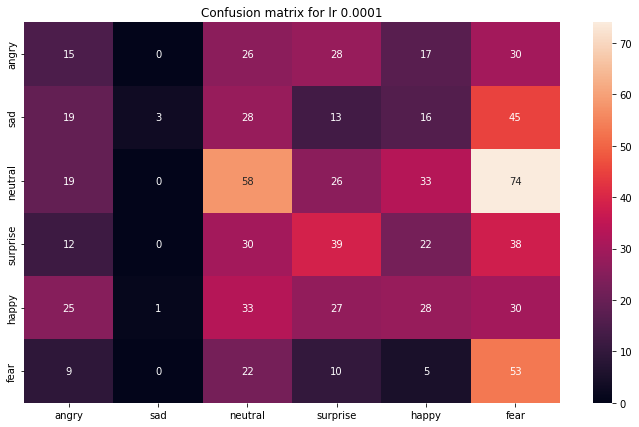

In [33]:
############ Define the dictionaries and set the values for number of epochs and batch size ############
hyper_parameters = {'learning_rate': [0.1, 0.01, 0.001, 0.0001]}
train_loss_hyper_paramaters = {'lr0.1':0, 'lr0.01':0, 'lr0.001': 0, 'lr0.0001' : 0}
train_acc_hyper_paramaters = {'lr0.1':0, 'lr0.01':0, 'lr0.001': 0, 'lr0.0001' : 0}

for learning_rate in hyper_parameters["learning_rate"]:
    print(f'Results of the learning rate = {learning_rate}')
    model = alexnet(pretrained = False)
    criterion = nn.CrossEntropyLoss()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    train_loader, test_loader, val_loader = load_data(train_path, test_path, 32, (128, 128))
    
    ############ Call the train function ###########
    num_epochs = 50
    training_loss, training_accuracy, model = train(num_epochs, model, train_loader, val_loader,criterion, optimizer)
    confusion_matrix_for_specific_LR(learning_rate, model, test_loader)
    
    test_acc = test(model, test_loader)
    print(f"Testing Accuracy for learning rate {learning_rate} = {test_acc}")
    saveModel(learning_rate)
    ############ Store train_loss, and train_accuracy in the defined dictionaries ###########
    train_loss_hyper_paramaters[f'lr{learning_rate}'] = training_loss
    train_acc_hyper_paramaters[f'lr{learning_rate}'] = training_accuracy

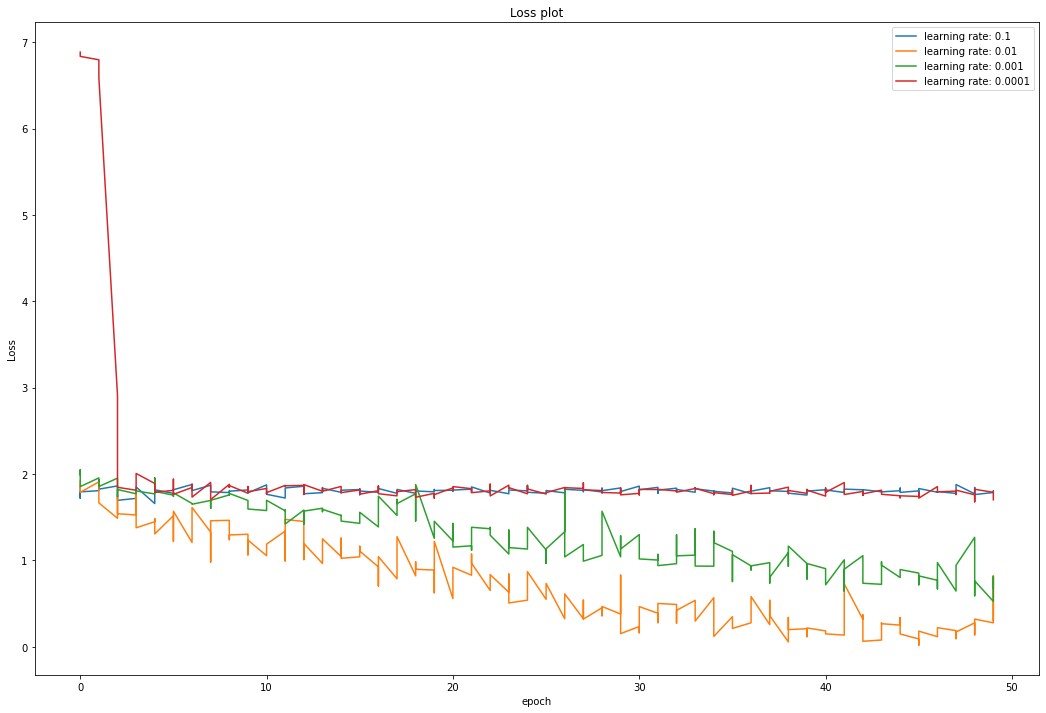

In [34]:
####### plotting train loss versus epoch for each learning rate in one plot #########

epochs = [i//3 for i in range(num_epochs*3)]
plt.figure(figsize=(18,12))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

for learning_rate in hyper_parameters["learning_rate"]:
    plt.plot(epochs,train_loss_hyper_paramaters[f'lr{learning_rate}'],label=f'learning rate: {learning_rate}')
    
plt.legend()
plt.savefig('Loss_AlexNet_BW.png')

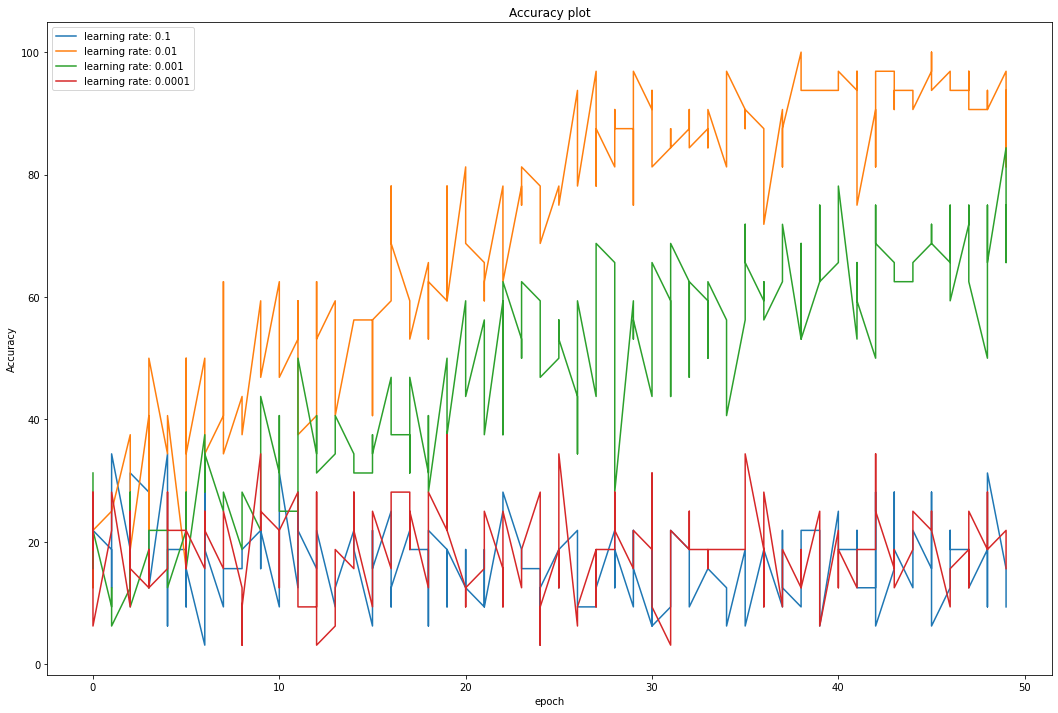

In [35]:
####### plotting train accuracy versus epoch for each learning rate in one plot #########

epochs = [i//3 for i in range(num_epochs*3)]
plt.figure(figsize=(18,12))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

for learning_rate in hyper_parameters["learning_rate"]:
    plt.plot(epochs,train_acc_hyper_paramaters[f'lr{learning_rate}'],label=f'learning rate: {learning_rate}')
    
plt.legend()
plt.savefig('Accuracy_AlexNet_BW.png')